In [31]:
from icecube import dataio, dataclasses


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jp_mpl as jplot
%matplotlib inline

In [3]:
infile_name = '/home/jp/icecube/data/noise_test/modified_test.i3.gz'

In [27]:
infile = dataio.I3File(infile_name)

In [81]:
def get_all_times(infile_name, omkey = None):
    infile = dataio.I3File(infile_name)
    times = []
    for frame in infile:
        inice = frame['InIceRawData']
        for om, hits in inice:
            if len(hits) < 2:
                continue
            prev_time = -1E9
            for ihit, one_hit in enumerate(hits):
                if ihit > 0:
                    times.append(one_hit.time - prev_time)
                prev_time = one_hit.time
    infile.close()
    return np.array(times)

In [76]:
def get_launches_dt(infile_name):
    infile = dataio.I3File(infile_name)
    times = []
    #dom_matrix = np.zeros([87, 61])
    for frame in infile:
        # New event, new dom matrix
        inice = frame['InIceRawData']
        for om, hits in inice:
            # Only using first time anyway
            if dom_matrix[om.string, om.om] != 0. :
                times.append(hits[0].time - dom_matrix[om.string, om.om])
            dom_matrix[om.string, om.om] = hits[0].time
    infile.close()
    return np.array(times)

In [52]:
def get_om_hits(infile_name):
    dom_matrix = np.zeros([87, 61])
    infile = dataio.I3File(infile_name)
    times = []
    for frame in infile:
        inice = frame['InIceRawData']
        for om, hits in inice:
            dom_matrix[om.string, om.om] += len(hits)
    infile.close()
    return dom_matrix

In [86]:
times = get_all_times(infile_name)
#times = get_launches_dt(infile_name)


In [87]:
times

array([ 8025., 11150., 59800., ...,  5875.,  2825.,  4425.])

In [88]:
xaxis = np.linspace(3, 7, 41)
b, x = np.histogram(np.log10(times), xaxis)

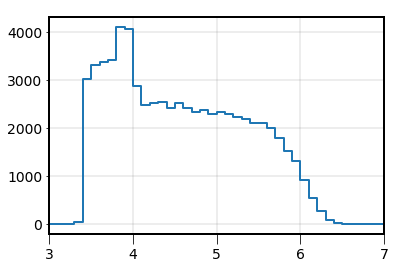

In [90]:
jplot.unfilledBar(x,b, color='C0', label='Modified noise rate')

In [53]:
dom_matrix = get_om_hits(infile_name)

In [56]:
dom_matrix.max()

77.0

In [21]:
one_hit.time

1217028.6192332804

In [91]:
print frame

[ I3Frame  (DAQ):
  'CorsikaWeightMap' [DAQ] ==> I3Map<string, double> (231)
  'I3EventHeader' [DAQ] ==> I3EventHeader (99)
  'I3MCTree' [DAQ] ==> TreeBase::Tree<I3Particle, I3ParticleID, i3hash<I3ParticleID> > (32)
  'I3TriggerHierarchy' [DAQ] ==> I3Tree<I3Trigger> (134)
  'I3Triggers' [DAQ] ==> I3Tree<I3Trigger> (230)
  'IceTopRawData' [DAQ] ==> I3Map<OMKey, vector<I3DOMLaunch> > (46)
  'InIceRawData' [DAQ] ==> I3Map<OMKey, vector<I3DOMLaunch> > (7668)
  'MCTimeIncEventID' [DAQ] ==> I3PODHolder<bool> (27)
  'TimeShift' [DAQ] ==> I3PODHolder<double> (36)
  'noise_weight' [DAQ] ==> I3Map<string, double> (181)
]

